In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("mnist_train.csv",header=None)

In [7]:
data.shape

(60000, 785)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [24]:
data.rename(columns={0:"Target"},inplace=True)

In [50]:
data.sample(7)

,Target,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
27042,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28033,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57286,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11679,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32278,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45139,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36244,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
nu=data["Target"].nunique()

print(f"number of unique: {nu}")
print()
un=data["Target"].unique()

print(f"Unique values :{un}")

number of unique: 10

Unique values :[5 0 4 1 9 2 3 6 7 8]


In [176]:
print(f"data.shape: {data.shape}\ndata.ndim: {data.ndim}")

data.shape: (60000, 785)
data.ndim: 2


In [177]:
X=data.drop("Target",axis=1)
y=data["Target"]

In [178]:
print(f"X.shape: {X.shape}\nX.ndim: {X.ndim}\n\n")
print(f"y.shape: {y.shape}\ny.ndim:{y.ndim}")

X.shape: (60000, 784)
X.ndim: 2


y.shape: (60000,)
y.ndim:1


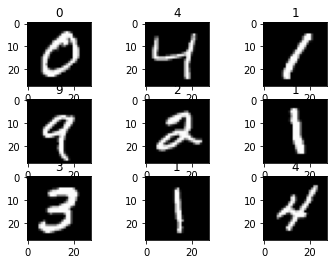

In [179]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X.values[i].reshape(28,28),cmap="gray")
    plt.title(y.values[i])

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [186]:
from xgboost import XGBClassifier

In [187]:
model=XGBClassifier()

In [188]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [189]:
y_pred=model.predict(X_test)

In [190]:
from sklearn.metrics import classification_report

In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1946
           1       0.99      0.99      0.99      2218
           2       0.96      0.98      0.97      1941
           3       0.98      0.96      0.97      2035
           4       0.97      0.97      0.97      1918
           5       0.97      0.97      0.97      1799
           6       0.99      0.99      0.99      1980
           7       0.97      0.97      0.97      2121
           8       0.96      0.97      0.97      1894
           9       0.96      0.97      0.96      1948

    accuracy                           0.97     19800
   macro avg       0.97      0.97      0.97     19800
weighted avg       0.97      0.97      0.97     19800



In [194]:
data_test=pd.read_csv("mnist_test.csv",header=None)

In [199]:
data_test=data_test.rename(columns={0:"Target"})

In [200]:
X_DataTest=data_test.drop("Target",axis=1)
y_DataTest=data_test["Target"]

In [202]:
y_pDT=model.predict(X_DataTest)

In [204]:
print(classification_report(y_DataTest,y_pDT))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

